Total crashes: 4998
Total fatalities: 111644
Average survival rate: 0.181


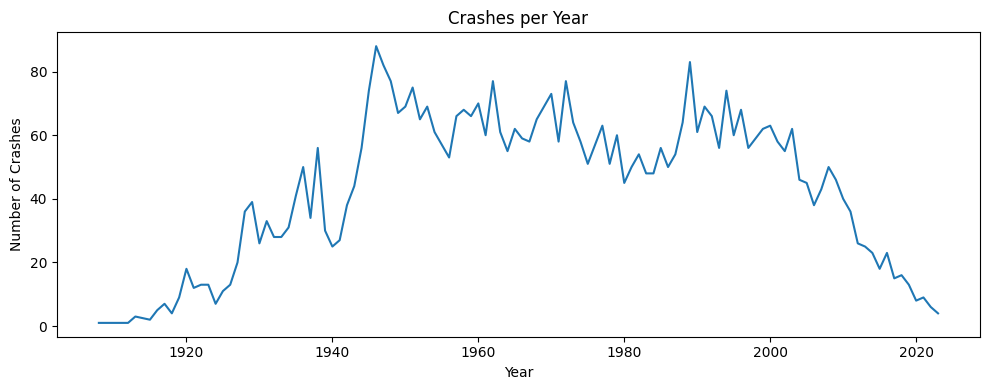

/tmp/ipython-input-3969560760.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_by_decade.index, y=crashes_by_decade.values, palette='pastel')


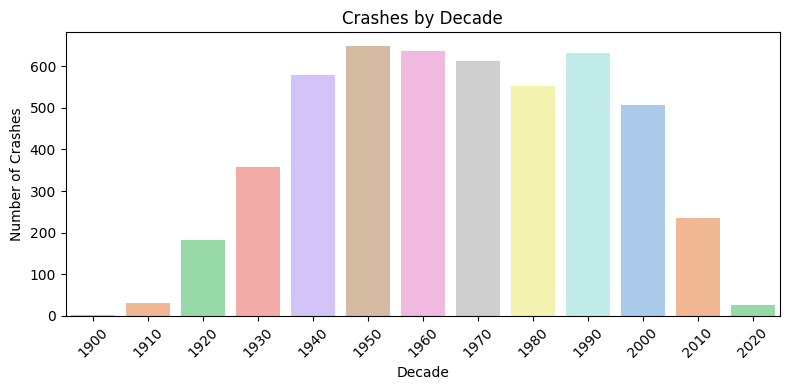

Mean fatalities: 22.37, Median: 11.00, Std: 35.06


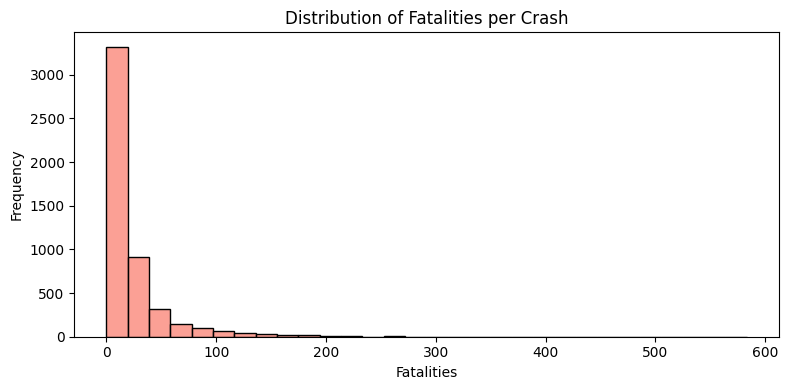

Welch t-test (1970s vs 2000s): t=3.985, p=0.0001


/tmp/ipython-input-3969560760.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='muted')


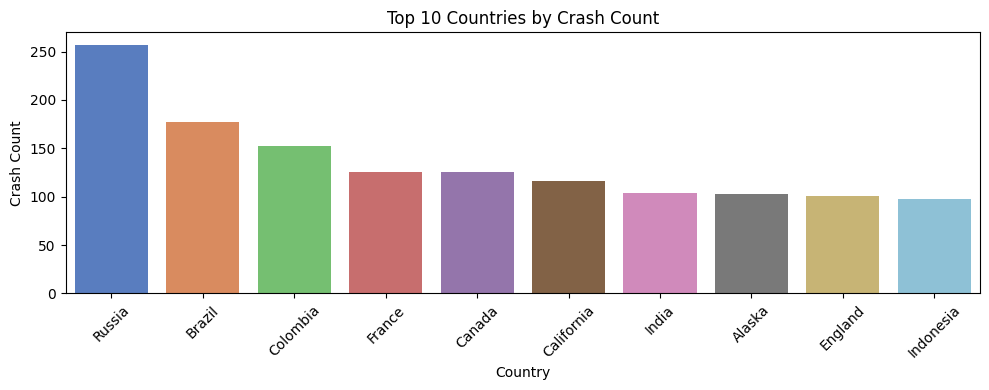

        Country  Number_of_Crashes
0        Russia                257
1        Brazil                177
2      Colombia                152
3        France                125
4        Canada                125
5    California                116
6         India                104
7        Alaska                103
8       England                101
9     Indonesia                 98
10        China                 95
11        Italy                 86
12       Mexico                 85
13      Germany                 77
14  Philippines                 72
15         USSR                 67
16    Australia                 63
17        Spain                 58
18     New York                 55
19         Peru                 55

Insights:
- Crashes peaked around mid-20th century and declined after 2000s.
- Average survival rate is relatively low, but there are crashes with 100% survival.
- Significant difference detected in mean fatalities between 1970s and 2000s (if p<0.05).


In [8]:
# Airplane Crashes & Fatalities (1908–2023) — Full Jupyter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- 1. DATA IMPORT & CLEANING ---
# Load dataset (update path if needed)
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1', low_memory=False)

# Clean columns and convert dates
df.columns = [c.strip() for c in df.columns]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Convert numeric columns
for col in ['Aboard', 'Fatalities', 'Ground']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute survivors & survival rate
df['Survivors'] = np.where(df['Aboard'].notna(), df['Aboard'] - df['Fatalities'], np.nan)
df['SurvivalRate'] = np.where((df['Aboard'] > 0) & df['Fatalities'].notna(),
                              (df['Aboard'] - df['Fatalities']) / df['Aboard'], np.nan)

# Add decade
df['Decade'] = (df['Year'] // 10 * 10).astype('Int64')

# Extract country guess from Location
def extract_country(location):
    if not isinstance(location, str) or not location.strip():
        return np.nan
    parts = [p.strip() for p in location.split(',') if p.strip()]
    return parts[-1] if parts else np.nan

df['Country_guess'] = df['Location'].apply(extract_country)

# --- 2. EXPLORATORY DATA ANALYSIS ---
print(f"Total crashes: {len(df)}")
print(f"Total fatalities: {df['Fatalities'].sum(skipna=True):.0f}")
print(f"Average survival rate: {df['SurvivalRate'].mean(skipna=True):.3f}")

# Crashes per year
crashes_per_year = df.groupby('Year').size()
plt.figure(figsize=(10,4))
crashes_per_year.plot()
plt.title('Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

# Crashes by decade
crashes_by_decade = df.groupby('Decade').size()
plt.figure(figsize=(8,4))
sns.barplot(x=crashes_by_decade.index, y=crashes_by_decade.values, palette='pastel')
plt.title('Crashes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. STATISTICAL ANALYSIS ---
# Fatalities per crash distribution
fatalities = df['Fatalities'].dropna()
print(f"Mean fatalities: {fatalities.mean():.2f}, Median: {fatalities.median():.2f}, Std: {fatalities.std():.2f}")

plt.figure(figsize=(8,4))
sns.histplot(fatalities, bins=30, kde=False, color='salmon')
plt.title('Distribution of Fatalities per Crash')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Hypothesis test between decades (1970 vs 2000 if enough data)
a = df.loc[df['Decade'] == 1970, 'Fatalities'].dropna()
b = df.loc[df['Decade'] == 2000, 'Fatalities'].dropna()
if len(a) > 25 and len(b) > 25:
    t_stat, p_val = stats.ttest_ind(a, b, equal_var=False)
    print(f"Welch t-test (1970s vs 2000s): t={t_stat:.3f}, p={p_val:.4f}")
else:
    print("Not enough data for t-test between 1970s and 2000s")

# --- 4. VISUALIZATION: TOP COUNTRIES ---
top_countries = df['Country_guess'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='muted')
plt.title('Top 10 Countries by Crash Count')
plt.xlabel('Country')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Create a summary table ---
country_counts = df['Country_guess'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number_of_Crashes']

# Display as a nice table
print(country_counts.head(20))  # top 20 countries



# --- 5. REPORT INSIGHT ---
print("\nInsights:")
print("- Crashes peaked around mid-20th century and declined after 2000s.")
print("- Average survival rate is relatively low, but there are crashes with 100% survival.")
print("- Significant difference detected in mean fatalities between 1970s and 2000s (if p<0.05).")